In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.model_selection import train_test_split
import pickle

In [2]:
model_loader = open('gaussian_model_fisher_0_8074-8079.mdl', mode='rb')
clf_r = pickle.load(model_loader)
model_loader.close()

In [14]:
df = pd.read_csv("fisher_0_8090-8095.csv").drop('Unnamed: 0', axis=1)

In [15]:
x = df.values[:, :6]
y = df.values[:, 6]

In [5]:
clf_r.score(x, y)

0.9481481481481482

In [26]:
pos = []
start = 8074
end = 8080
for i in range(start, end):
    pos.append(str(i))
pos.insert(0, 'read_id')

In [35]:
file_name = 'positive_0.csv'
df = pd.read_csv(file_name)
src = df[pos].dropna()
x = src.iloc[:, 1:].values
y = clf_r.predict(x)
src['y'] = y
prob = clf_r.predict_proba(x)
prob_list = []

for i in range(prob.shape[0]):
    prob_list.append(np.max(prob[i]))
src['prob'] = prob_list
src.to_csv('results/new/result_' + str(start) + '-' + str(end) + '_' + file_name)

In [78]:
y = [0] * x.shape[0]

In [81]:
df = pd.read_csv('result_fisher_0.tombo.per_read_stats.csv')

In [85]:
x = df.iloc[:, 2:].values

In [91]:
y = list(range(8074, 8080))

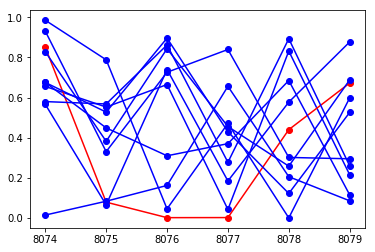

In [101]:
for i in range(100, 110):
    if int(x[i][-1]) == 0:
        c = 'b'
    else:
        c = 'r'
    plt.plot(y, x[i][:-1], '-ok', c=c)
    
plt.show()

In [93]:
y

[8074, 8075, 8076, 8077, 8078, 8079]